<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Regression Metrics

_Authors: Matt Brems (DC), Dave Yerrington (SF)_

### Introduction

We've learned a lot about linear regression models thus far.
- How to fit linear regression models.
- How to identify candidates for independent variables.
- The assumptions of linear regression models and how to assess their validity.

One thing we haven't discussed in significant detail is how to measure the performance of a regression model. 
- What makes a good model?
- What makes a bad model?
- Between two good models, which should we pick and why?

**Discussion:** What makes a good model versus a bad model? How can we measure that?

Metrics, or measurements, will allow us to directly compare models that attempt to achieve the same goal.
- Note: Depending on the metric, we might need to be wary of the scale of our $Y$ values!

**The Process of Data Science**
1. Problem Statement
1. Key Metrics
1. Data Gathering
1. Data Cleaning/Munging
1. EDA
1. Modeling
1. Reporting
    - Model evaluation will mostly be used in steps 4 and 5.

Once we build models, we want to [evaluate their performance](http://scikit-learn.org/stable/modules/model_evaluation.html)!

### Regression Metrics
We're going to go through six different regression metrics.
1. Mean Squared Error
2. Root Mean Squared Error
3. Mean Squared Log Error (briefly)
4. Median Absolute Error
5. $R^2$
6. Adjusted $R^2$ (briefly)

In [1]:
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
import pandas as pd

from matplotlib.pyplot import *

# our custom plotting function!
from plot_scores import plot_scores

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
## Load some data
fires = pd.read_csv("forestfires.csv")
fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [53]:
## Build a really AWFUL model here

In [4]:
y = fires['area']

In [5]:
X = fires.drop(['month', 'day', 'area'], axis='columns')

In [9]:
regression = linear_model.LinearRegression()
model = regression.fit(X, y)
y_hat = model.predict(X)

In [8]:
model.coef_

array([ 1.90794524e+00,  5.69180991e-01, -3.91995160e-02,  7.73345196e-02,
       -3.29461471e-03, -7.13739029e-01,  8.00212731e-01, -2.30644773e-01,
        1.55743147e+00, -3.40403700e+00])

In [12]:
coefs = pd.DataFrame([model.coef_], columns=X.columns)
coefs.T
# or
# list(zip(model.coef_, X.columns))

,0
X,1.907945
Y,0.569181
FFMC,-0.039200
DMC,0.077335
DC,-0.003295
ISI,-0.713739
temp,0.800213
RH,-0.230645
wind,1.557431
rain,-3.404037


In [31]:
## Score the model
model.score(X, y)

0.7406077428649427

#### Mean Squared Error

$$MSE(\mathbf{y},\hat{\mathbf{y}}) = \frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

##### ![](https://upload.wikimedia.org/wikipedia/commons/e/ed/Residuals_for_Linear_Regression_Fit.png)

Goal: Get $MSE$ as close to 0 as possible.

Pros: 
- Very common; part of other calculations.
- Represents average distance squared from the predicted value.

Cons: 
- Can be heavily affected by outliers.
- Not in the original units of $Y$.
- Depends on scale of $Y$. (i.e. housing prices vs. GPA)

[Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)

In [14]:
# A:
metrics.mean_squared_error(y, y_hat)

3956.7092182333945

#### Root Mean Squared Error

$$RMSE(\mathbf{y},\hat{\mathbf{y}}) = \sqrt{\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Goal: Get $RMSE$ as close to 0 as possible.

Pros: 
- Pretty common; part of other calculations.
- Represents (approximately) average distance from the predicted value.
- In the original units of $Y$.

Cons: 
- Can be heavily affected by outliers.
- Depends on scale of $Y$. (i.e. housing prices vs. GPA)

There's no documentation, but it should be quite easy to generate the value.

In [15]:
# A:
metrics.mean_squared_error(y, y_hat) ** .5

62.90237847834845

#### Mean Squared Log Error
$$MSLE = \frac{1}{n}\sum_{i=1}^n\left(\log(\hat{y} + 1) - log(y + 1)\right) ^ 2$$

Note: $\log(\cdot)$ in this case refers to the natural logarithm or the logarithm with base $e \approx 2.71828$. 

Goal: Get $MSLE$ as close to 0 as possible.

Pros: 
- If predicted and observed values are both large, their difference is likely going to be large as well. The logarithm helps to account for that scale.

Cons: 
- Not in the original values of $Y$.
- Depends on scale of $Y$. (i.e. housing prices vs. GPA)
- $\log(0)$ is not defined.

> **From scikit-learn docs**
>
> "This metric is best to use when targets having exponential growth, such as population counts, average sales of a commodity over a span of years etc. Note that this metric penalizes an under-predicted estimate greater than an over-predicted estimate."
> [Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error)

#### Median (and Mean) Absolute Error

$$MedAE(\mathbf{y},\hat{\mathbf{y}}) = \text{median}\left(\left|y_1-\hat{y}_1\right|,\ldots ,\left|y_n-\hat{y}_n\right|\right)$$


Goal: Get $MedAE$ as close to 0 as possible.

Pros: 
- Represents median distance from the predicted value.
- In the original units of $Y$. 
- Is not heavily affected by outliers.

Cons: 
- Depends on scale of $Y$. (i.e. housing prices vs. GPA)

[Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)

In [16]:
# Median absolute error
metrics.median_absolute_error(y, y_hat)

12.166843506305357

In [17]:
# mean absolute error
metrics.mean_absolute_error(y, y_hat)

19.296884540072288

#### Coefficient of Determination, $R^2$

$$R^2 = \frac{\text{Explained variance}}{\text{Total variance}} = 1 - \frac{\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\sum_{i=1}^n(y_i - \bar{y})^2}$$

Goal: Get $R^2$ as close to 1 as possible.

> - score = 0: Model explains none of the variability of the response data around its mean.
> - score = 1: Model explains all the variability of the response data around its mean.

Pros:
- Easy interpretation. "An $R^2$ value of 0.8 means that 80% of the variability in the data are explained by our model, relative to a model with no predictors."
- Common metric.
- Does not depend on the scale of $Y$.
- Works with more than just _linear_ regression.

Cons:
- As you add more variables, $R^2$ will never decrease (with linear regression). Adjusted R2 can handle this assumption better.

> Are low $R^2$ scores bad?
>
> I'm glad you asked!  Not everything in regression is about getting the best predictions.  In some fields, such as human behavior, you would expect to achieve scores much lower then %50!  For inference, perhaps .3 is enough to measure an effect then reported reliably!  Yes, there is more to machine learning than prediction.  Inference can be the goal as well!

[Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)

In [20]:
## Code up different model here to show effect of using all vs some variables, boston housing?
from sklearn.datasets import load_boston

data = load_boston()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

columns = X.columns

regression = linear_model.LinearRegression()
model = regression.fit(X[columns], y)
model.score(X[columns], y)

0.7406077428649427

Show model score vs r2_score:

For linear regression they are exactly the same!  Each model in sklearn will use a different score method.  For regression methods R2 is the default.  I’ll show you guys again!

#### Adjusted $R^2$

$$R^2_{adj} = 1 - \frac{\frac{1}{n-p-1}\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\frac{1}{n-1}\sum_{i=1}^n(y_i - \bar{y})^2}$$

Goal: Get $R^2_{adj}$ as close to 1 as possible.

$R^2_{adj}$ is a modified version of $R^2$ than can account for the number of predictors in the model. $R^2_{adj}$ increases only if the new term improves the model more than would be expected by chance.

Pros:
- Does not depend on the scale of $Y$.
- Penalizes for "bad" variables.

Cons:
- Interpretation isn't exactly the same, although we often treat it as such.

>  I believe that:
>  - n = sample size
>  - p = number of predictors
>  - Always lower than R2!

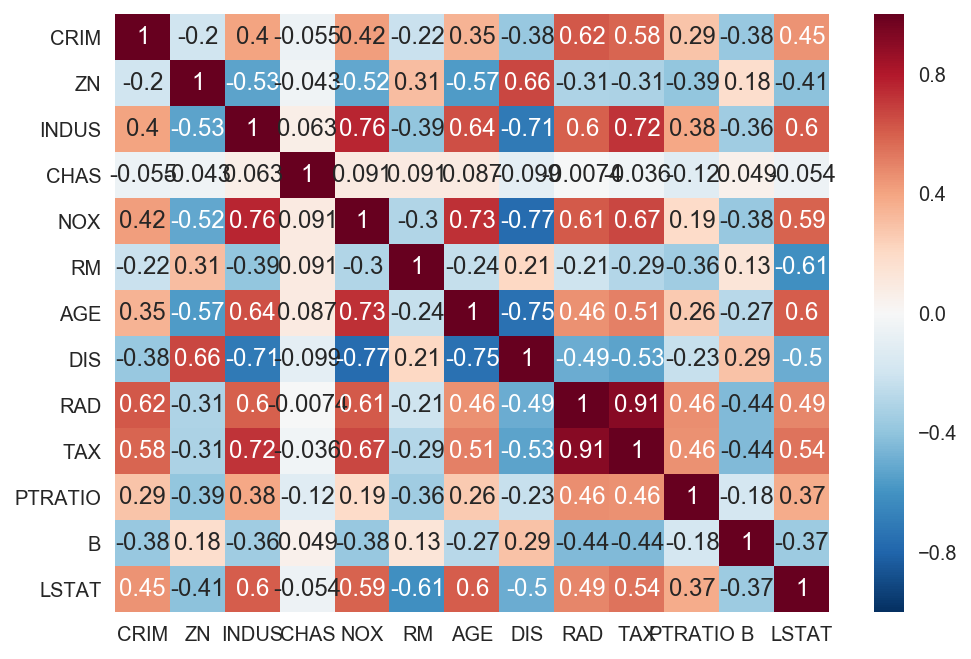

In [23]:
import seaborn as sns
sns.heatmap(X.corr(), annot=True);

### Feature Selection - Briefly

Slightly different from feature engineering is **feature selection**. Feature selection is (unsurprisingly) the process by which we select which features to include in our model.

- Suppose we have five features. How might we select which ones to include when modeling?
- Suppose we have five hundred features. How might we select which ones to include when modeling?

It is to our benefit to have an [automated means](http://scikit-learn.org/stable/modules/feature_selection.html) of identifying features to include/exclude.

#### Forward Selection
1. Start with null model (just $\hat{y} = \beta_0$).
2. Add one feature by testing all possible features $X_i$ and picking the **best** based on some metric.
3. Repeat until a stopping condition is met.

#### Backward Selection
1. Start with full model ($\hat{y} = \beta_0 + \beta_1X_1 + \cdots \beta_pX_p$).
2. Remove one feature by testing all possible features $X_i$ and picking the **worst** based on some metric.
3. Repeat step 2 until a stopping condition is met.

### In-class Activity

The following datasets are purely hypothetical datasets to illustrate the range of potential range of evaluation strategies.  We will not be looking at the model as a line, but the difference between prediction and observation related to residual error.

- Break into groups based on ~10 people (smaller classes can be their own group!).
- For each dataset containing the true values and their cooresponding predictions, explain what each of the metrics describe about the model.
- Compare and contrast to any other case in the set of examples when useful (few large residuals vs consistently small residuals).
- Write out any diagrams on a wall or desk for later presentation.

We will choose a case for each class to talk about over the camera, in terms of these metrics:

- Mean Squared Error
- Mean Absolute Error
- Median Absolute Error
- Root Mean Square Error
- Mean Squared Log Error (optional)
- $R^2$

Helpful pointers for comparison when thining through these cases:
- Effect of outliers?
- Scale and/or unit of error?

> _Assume our fake data is predicting the price of a home._
>
> - _Actual price of home - $y$_
> - _Predicted price of home - $\hat{y}$_

#### Case A: Model having low accuracy, and high variance between observation $y$ and prediction $\hat{y}$


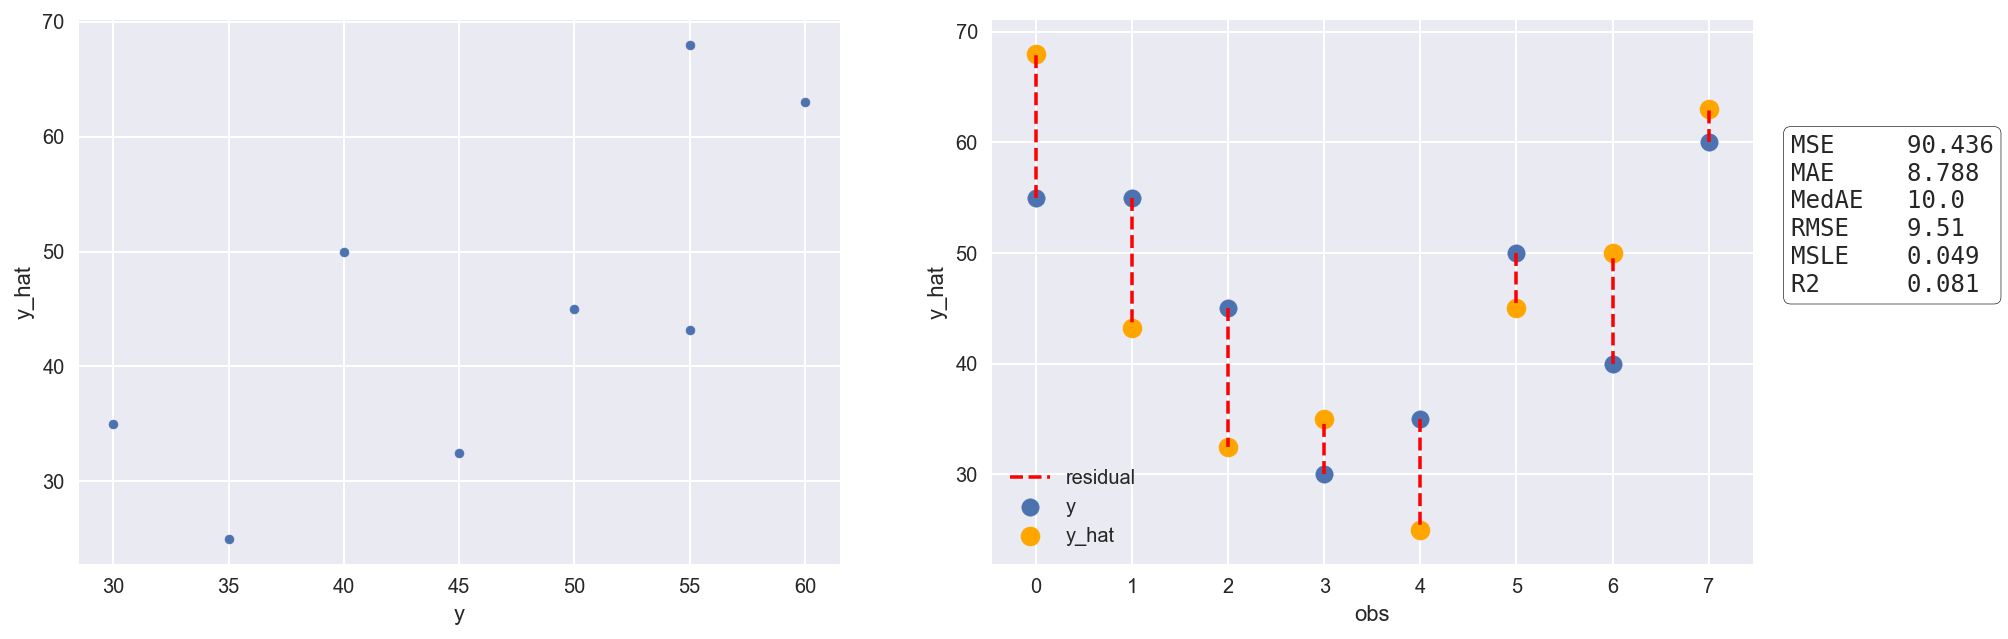

In [24]:
low_high = pd.DataFrame(
   [[55, 68], [55, 43.2], [45, 32.5], [30, 35], [35, 25], [50, 45],  [40, 50], [60, 63]],
   columns = ("y", "y_hat")
)

## Use our handy plot function!  (hopefully it works as it's our first version!)
plot_scores(low_high, kind="line", residuals=True)

#### Case B: Model having high accurancy, but a one large residual between prediction $\hat{y}$ and observation $y$

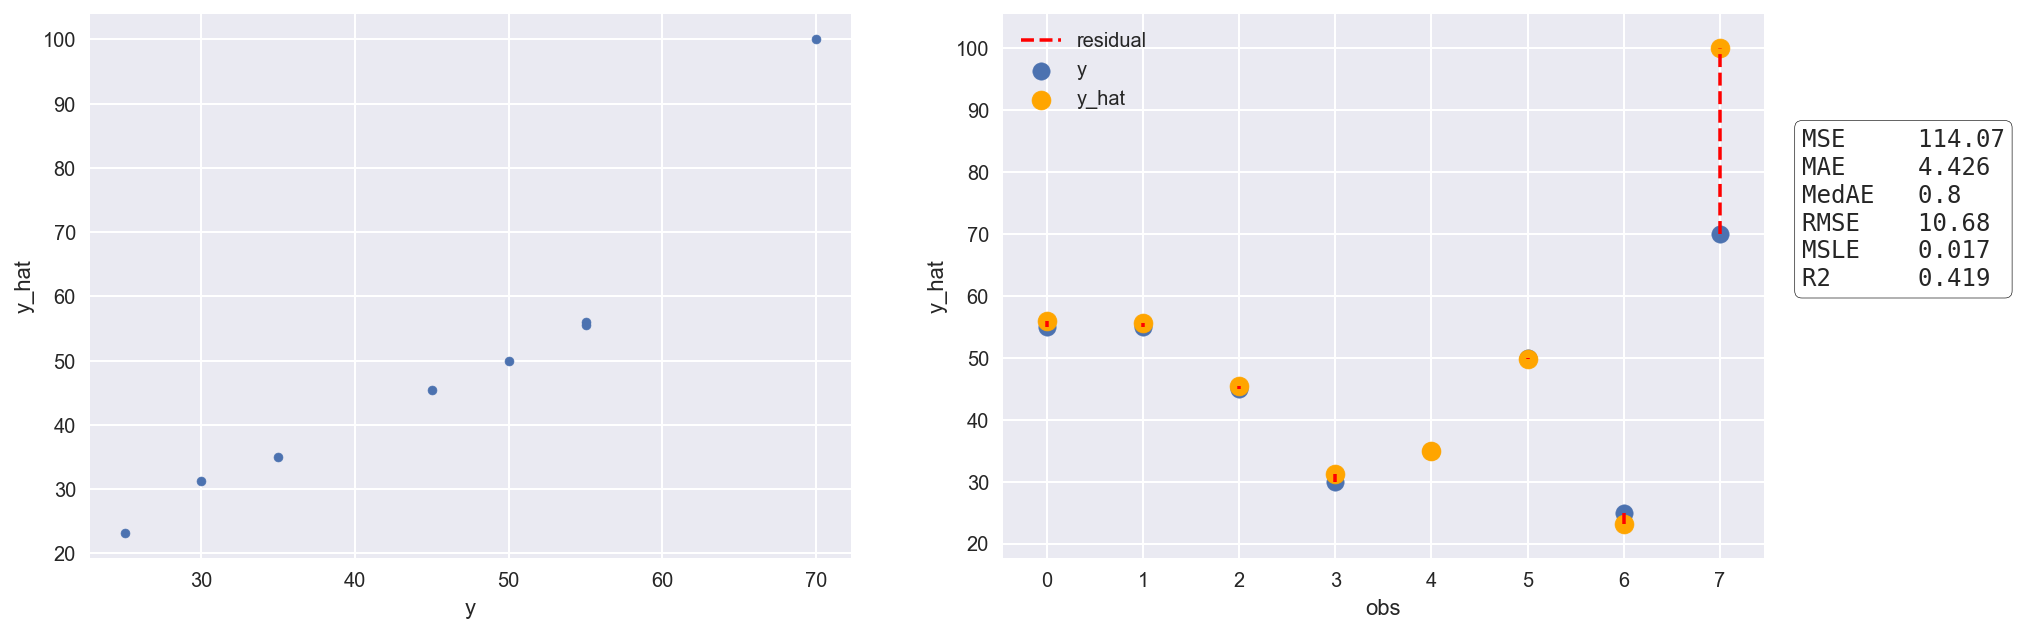

In [28]:
# Decent model, however with one large outlier
single_outlier = pd.DataFrame(
   [[55, 56], [55, 55.6], [45, 45.5], [30, 31.3], [35, 35], [50, 49.89],  [25, 23.2], [70, 100.1]],
   columns = ("y", "y_hat")
)
plot_scores(single_outlier, kind="line", residuals=True)

#### Case C: Model having medicore accurancy

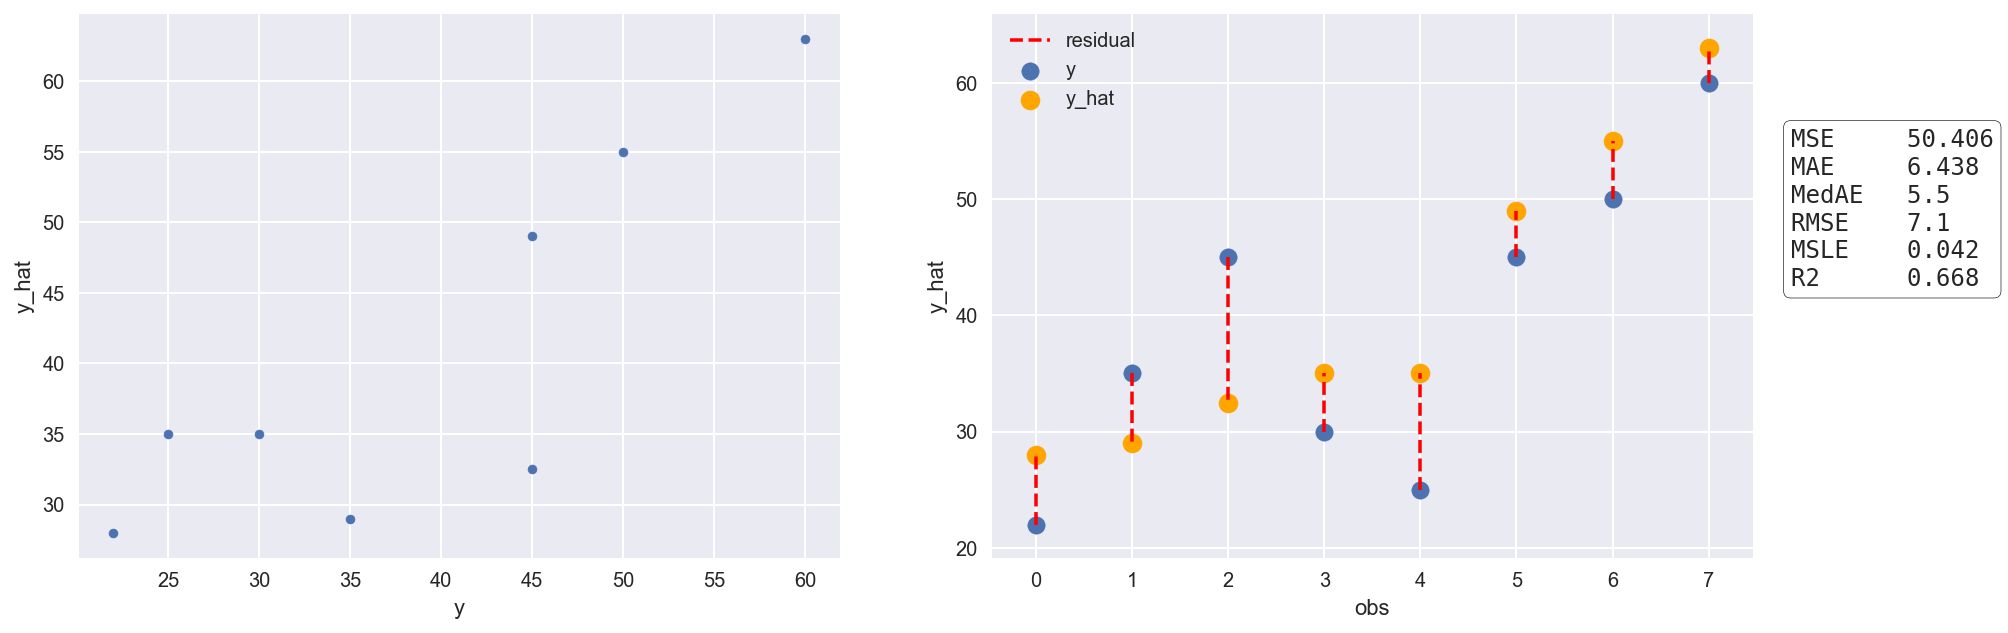

In [29]:
medium = pd.DataFrame(
   [[22, 28], [35, 29], [45, 32.5], [30, 35], [25, 35], [45, 49],[50, 55], [60, 63]],
   columns = ("y", "y_hat")
)
plot_scores(medium, kind="line", residuals=True)

#### Case D: Model having mostly over-predicted values from observation

- Bonus:  Why the negative $R^2$?

$$R^2 = 1 - \frac{\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\sum_{i=1}^n(y_i - \bar{y})^2}$$

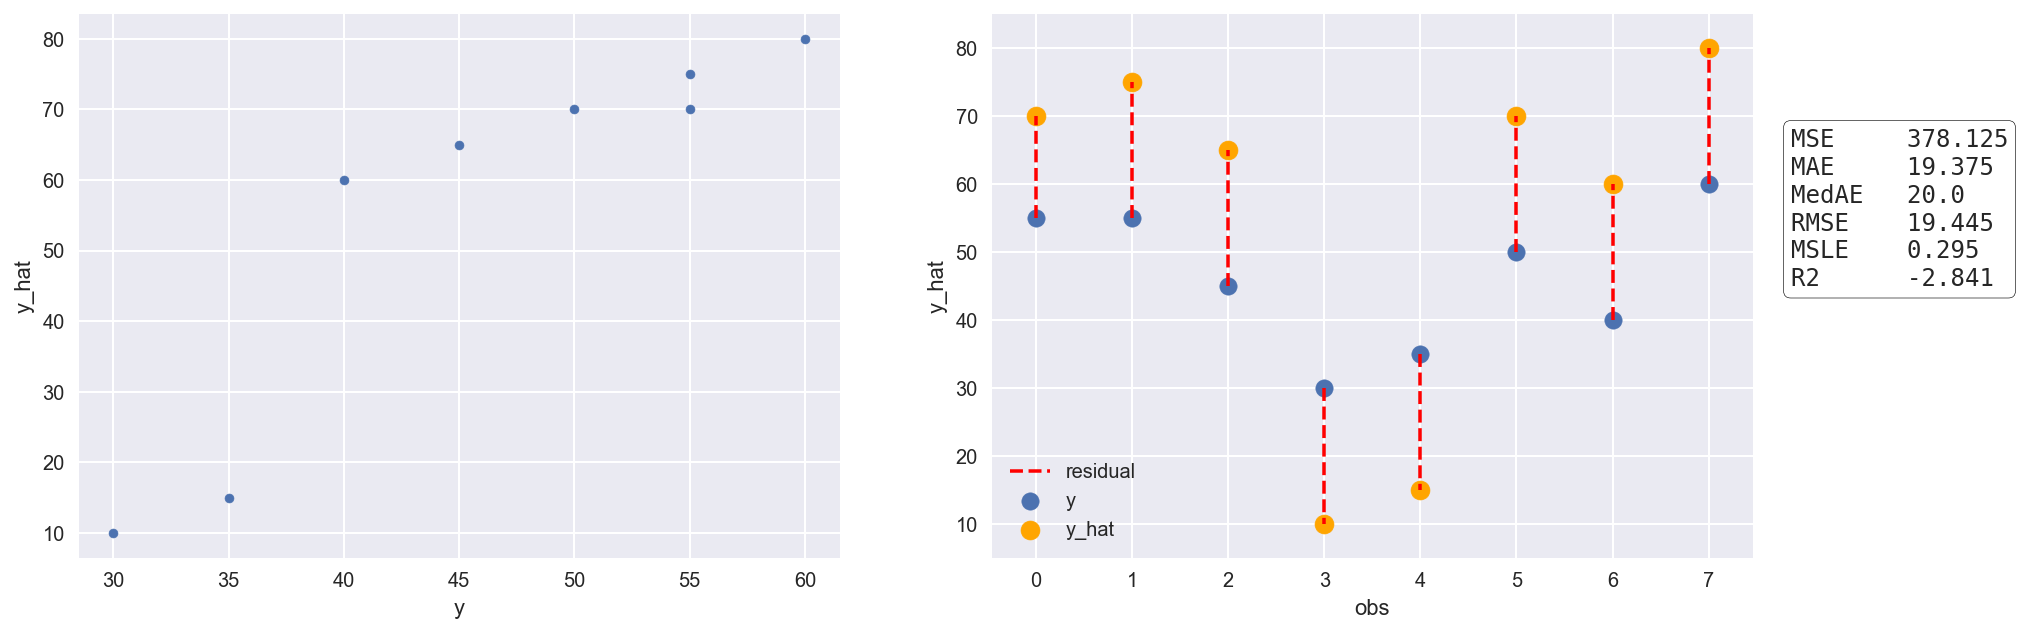

In [30]:
over_predicted = pd.DataFrame(
   [[55, 70], [55, 75], [45, 65], [30, 10], [35, 15], [50, 70],  [40, 60], [60, 80]],
   columns = ("y", "y_hat")
)
plot_scores(over_predicted, kind="line", residuals=True)